In [184]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [185]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [186]:
df = pd.read_csv('/content/drive/MyDrive/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [187]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [188]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [189]:
##Part 1 : Generate scatter plot matrix to identify relationship among different variables

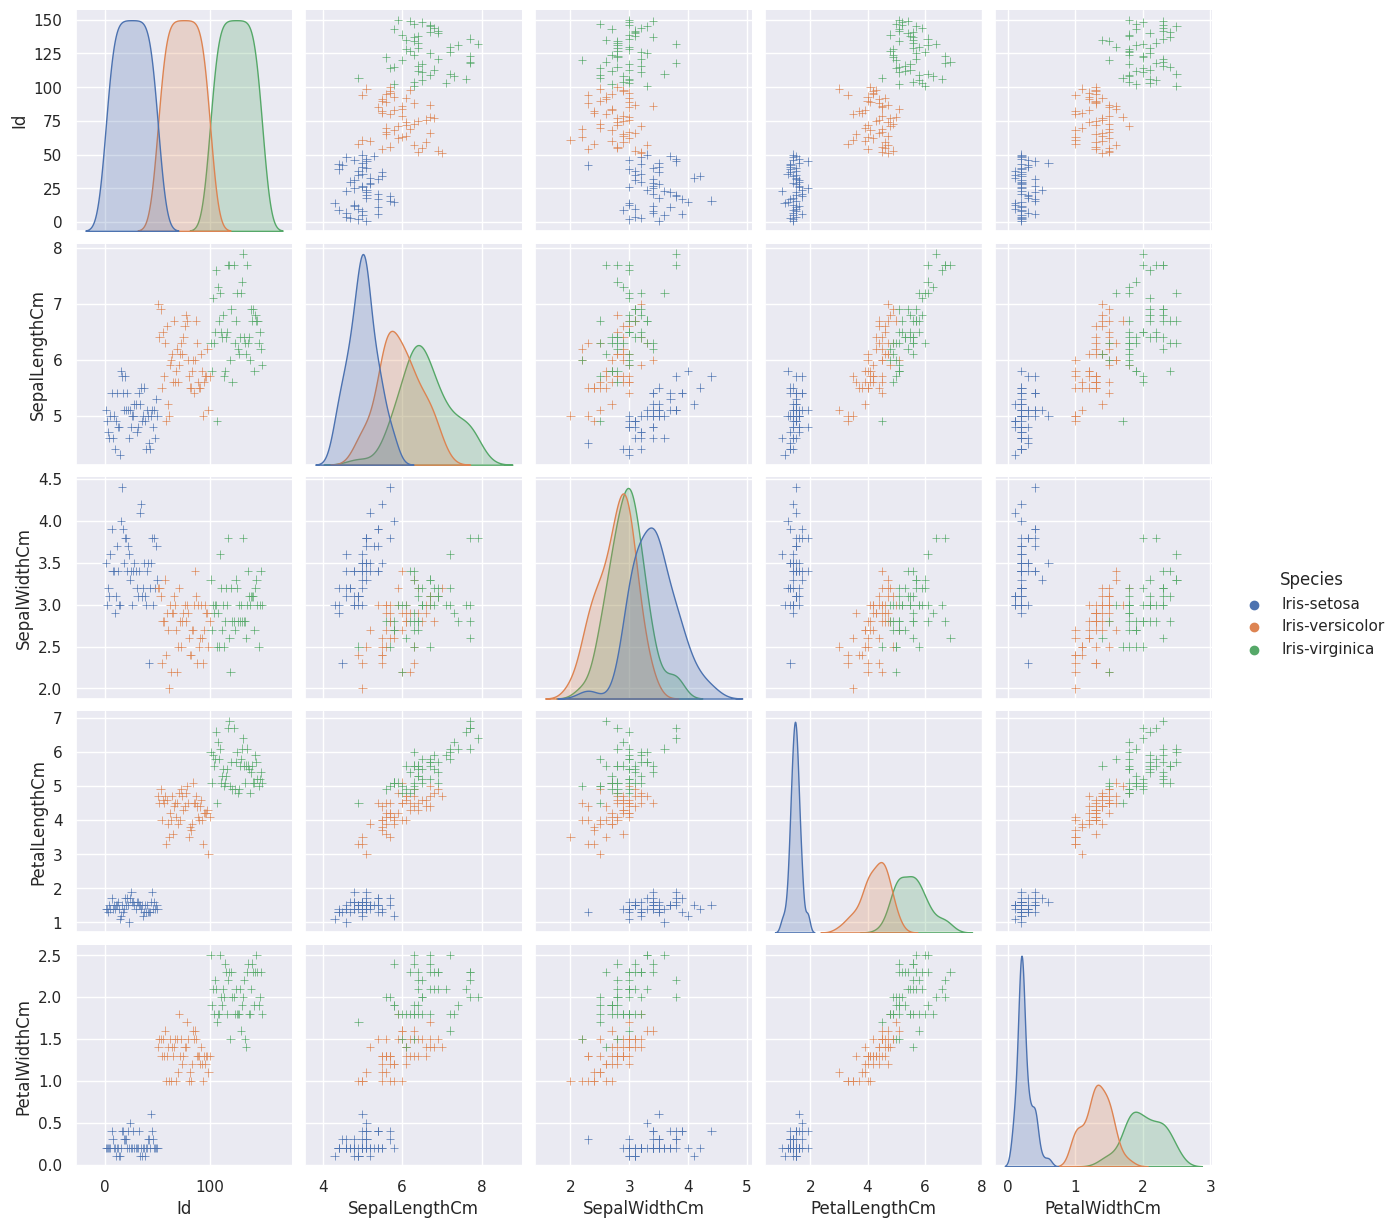

In [190]:
g = sns.pairplot(df, hue='Species', markers='+')
plt.show()

<ipython-input-191-1ac3abc6d922>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


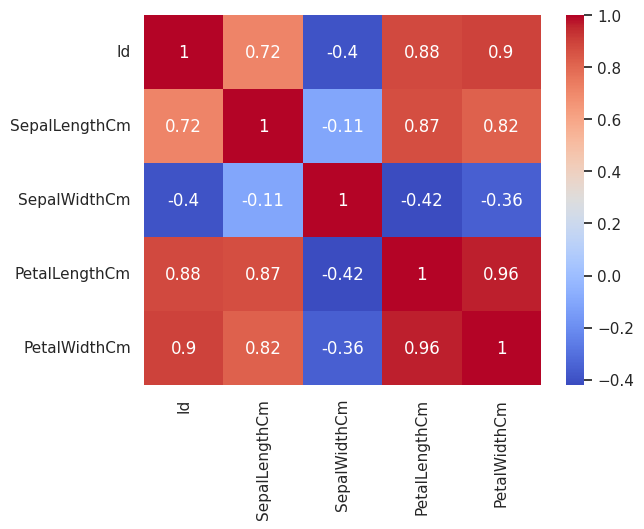

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create a correlation matrix
corr_matrix = df.corr()

# plot the heatmap
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# show the plot
plt.show()

In [192]:
sns.set_palette('flare')


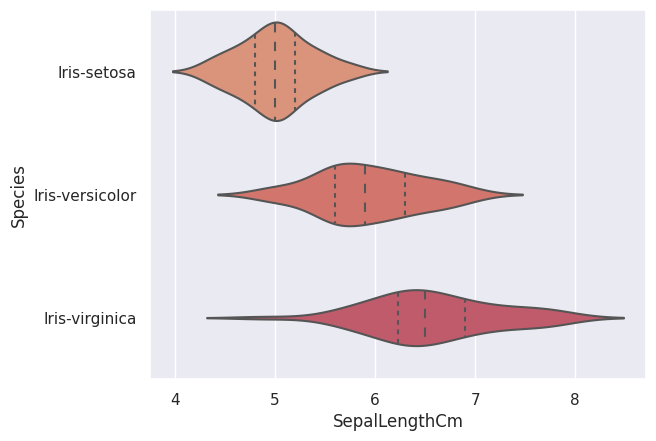

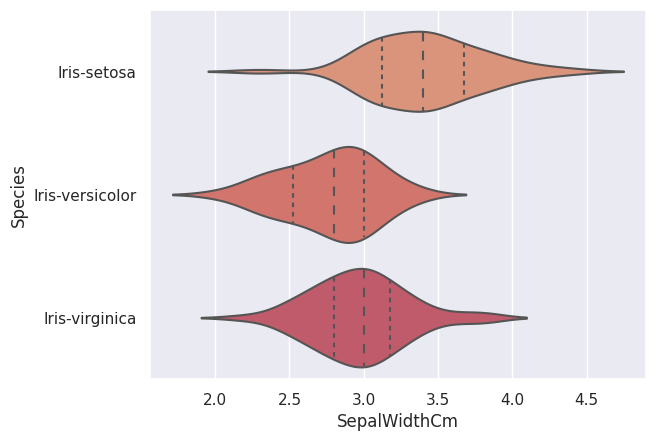

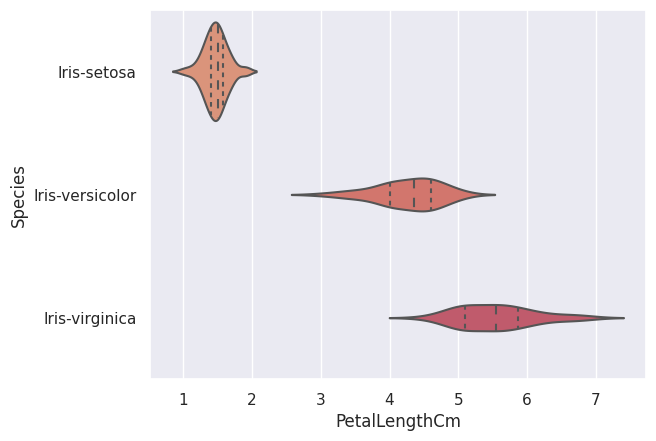

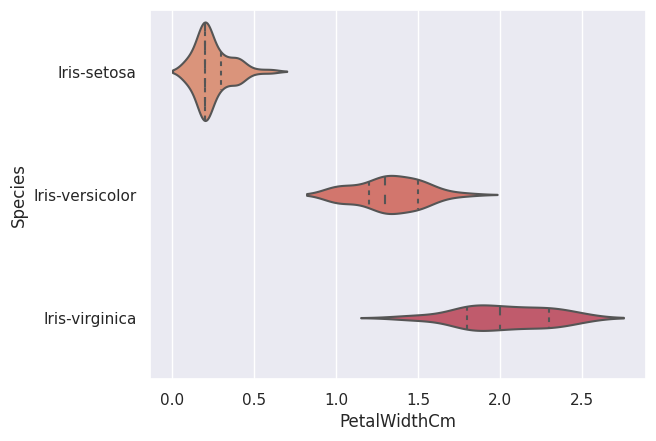

In [193]:
g = sns.violinplot(y='Species', x='SepalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='SepalWidthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalLengthCm', data=df, inner='quartile')
plt.show()
g = sns.violinplot(y='Species', x='PetalWidthCm', data=df, inner='quartile')
plt.show()

In [194]:
##Part 2: find out which classes are linearly separable.

In [195]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# load the iris dataset
iris = load_iris()

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3, random_state=42)

# train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# make predictions on the testing data
y_pred = logreg.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred, target_names=iris.target_names))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



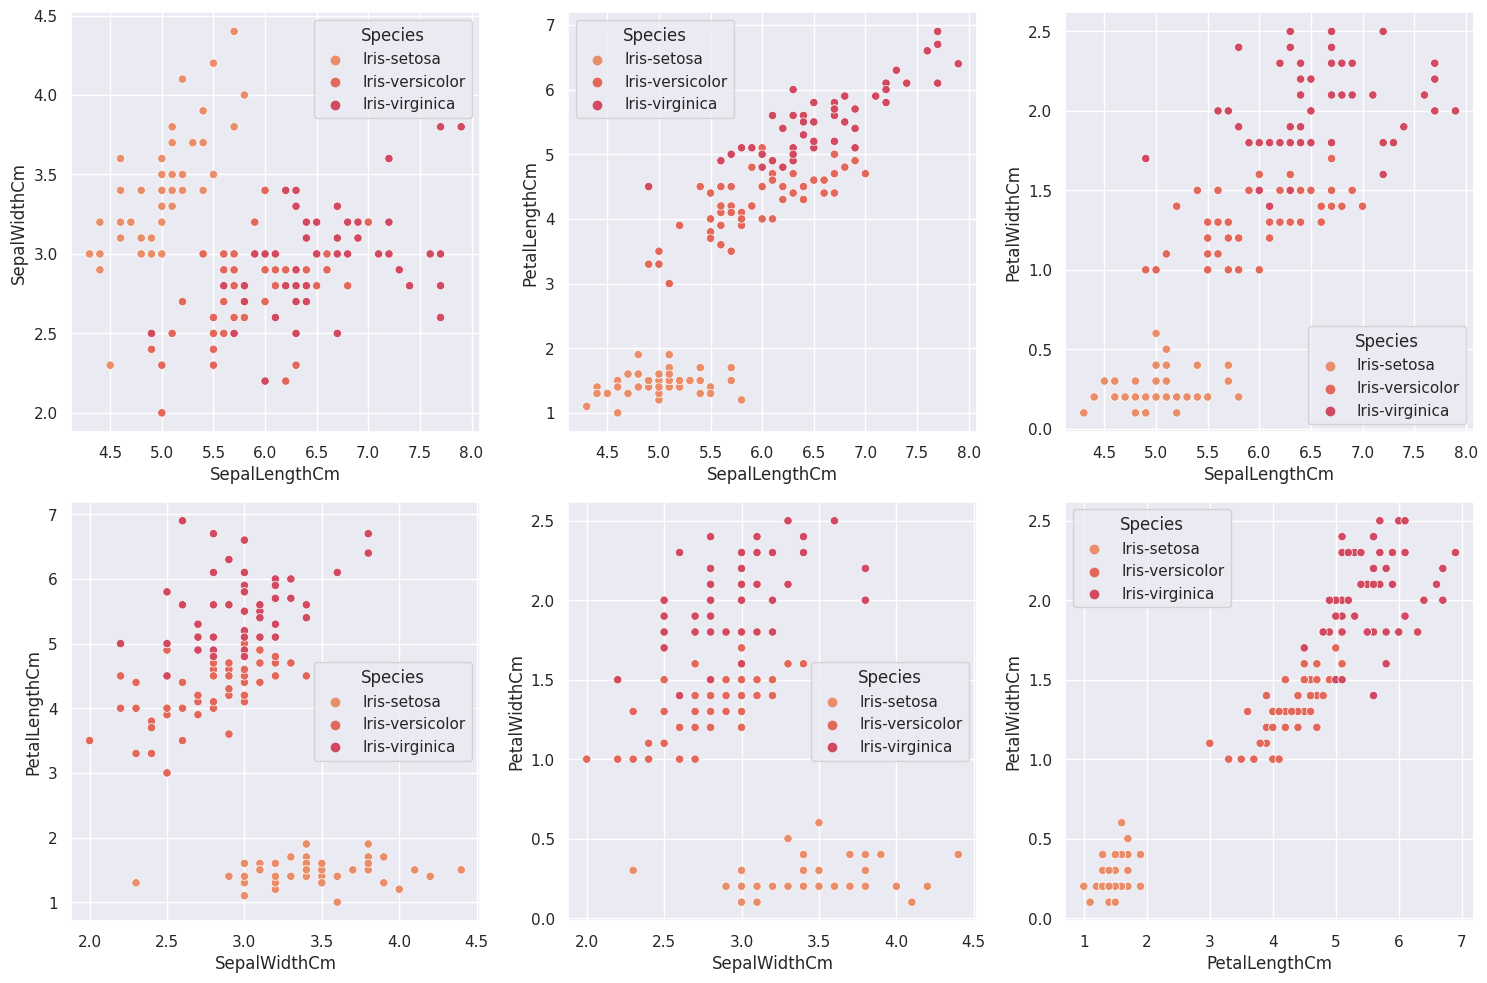

In [196]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.scatterplot(ax=axes[0, 0], data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species')
sns.scatterplot(ax=axes[0, 1], data=df, x='SepalLengthCm', y='PetalLengthCm', hue='Species')
sns.scatterplot(ax=axes[0, 2], data=df, x='SepalLengthCm', y='PetalWidthCm', hue='Species')
sns.scatterplot(ax=axes[1, 0], data=df, x='SepalWidthCm', y='PetalLengthCm', hue='Species')
sns.scatterplot(ax=axes[1, 1], data=df, x='SepalWidthCm', y='PetalWidthCm', hue='Species')
sns.scatterplot(ax=axes[1, 2], data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species')

plt.tight_layout()
plt.show()


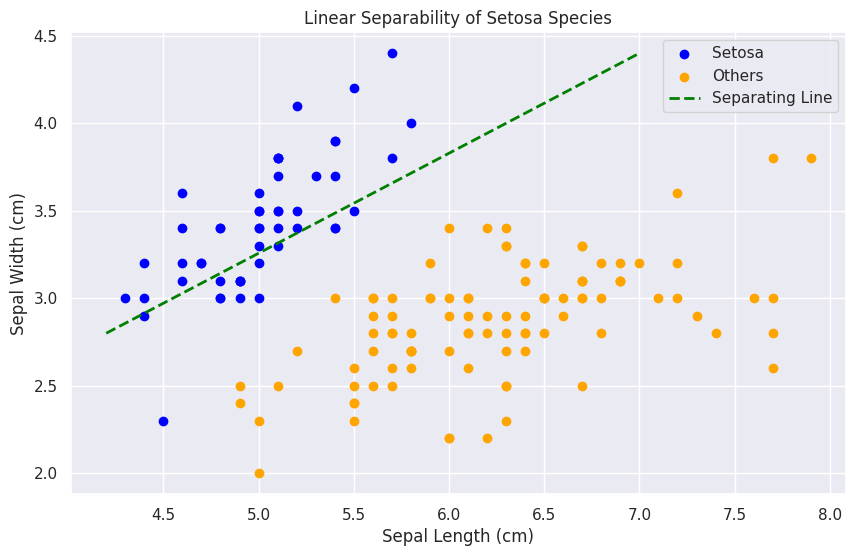

In [197]:
# Filter only Setosa species
setosa = df[df['Species'] == 'Iris-setosa']

# Plot scatter plot with separating line
plt.figure(figsize=(10, 6))
plt.scatter(setosa['SepalLengthCm'], setosa['SepalWidthCm'], color='blue', label='Setosa')
plt.scatter(df[df['Species'] != 'Iris-setosa']['SepalLengthCm'], df[df['Species'] != 'Iris-setosa']['SepalWidthCm'], color='orange', label='Others')
plt.plot([4.2, 7], [2.8, 4.4], color='green', linestyle='--', linewidth=2, label='Separating Line')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Linear Separability of Setosa Species')
plt.legend()
plt.show()


In [198]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches


In [199]:
df = pd.read_csv('/content/drive/MyDrive/adult.csv')

df.columns = ['age','workclass','fnlwgt','education','educationnum','marital status','occupation','relationship','race','sex','capitalgain','capital loss','hrs/week','native-country','income']

df.head(100)

,age,workclass,fnlwgt,education,educationnum,marital status,occupation,relationship,race,sex,capitalgain,capital loss,hrs/week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,48,Self-emp-not-inc,191277,Doctorate,16,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1902,60,United-States,>50K
96,37,Private,202683,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,>50K
97,48,Private,171095,Assoc-acdm,12,Divorced,Exec-managerial,Unmarried,White,Female,0,0,40,England,<=50K
98,32,Federal-gov,249409,HS-grad,9,Never-married,Other-service,Own-child,Black,Male,0,0,40,United-States,<=50K


In [200]:
from numpy import nan
df = df.replace('?',nan)
df.head()


,age,workclass,fnlwgt,education,educationnum,marital status,occupation,relationship,race,sex,capitalgain,capital loss,hrs/week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [201]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educationnum,0,0.0
marital status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


In [202]:
df['native-country'].fillna(df['native-country'].mode()[0],inplace = True)

In [203]:
df['workclass'].fillna(df['workclass'].mode()[0],inplace = True)

In [204]:
df['occupation'].fillna(df['occupation'].mode()[0],inplace = True)

In [205]:
null_values = df.isnull().sum()
null_values = pd.DataFrame(null_values,columns=['null'])
j=1
sum_total=len(df)
null_values['percentage'] = null_values['null']/sum_total
round(null_values*100,3).sort_values('percentage',ascending=False)

,null,percentage
age,0,0.0
workclass,0,0.0
fnlwgt,0,0.0
education,0,0.0
educationnum,0,0.0
marital status,0,0.0
occupation,0,0.0
relationship,0,0.0
race,0,0.0
sex,0,0.0


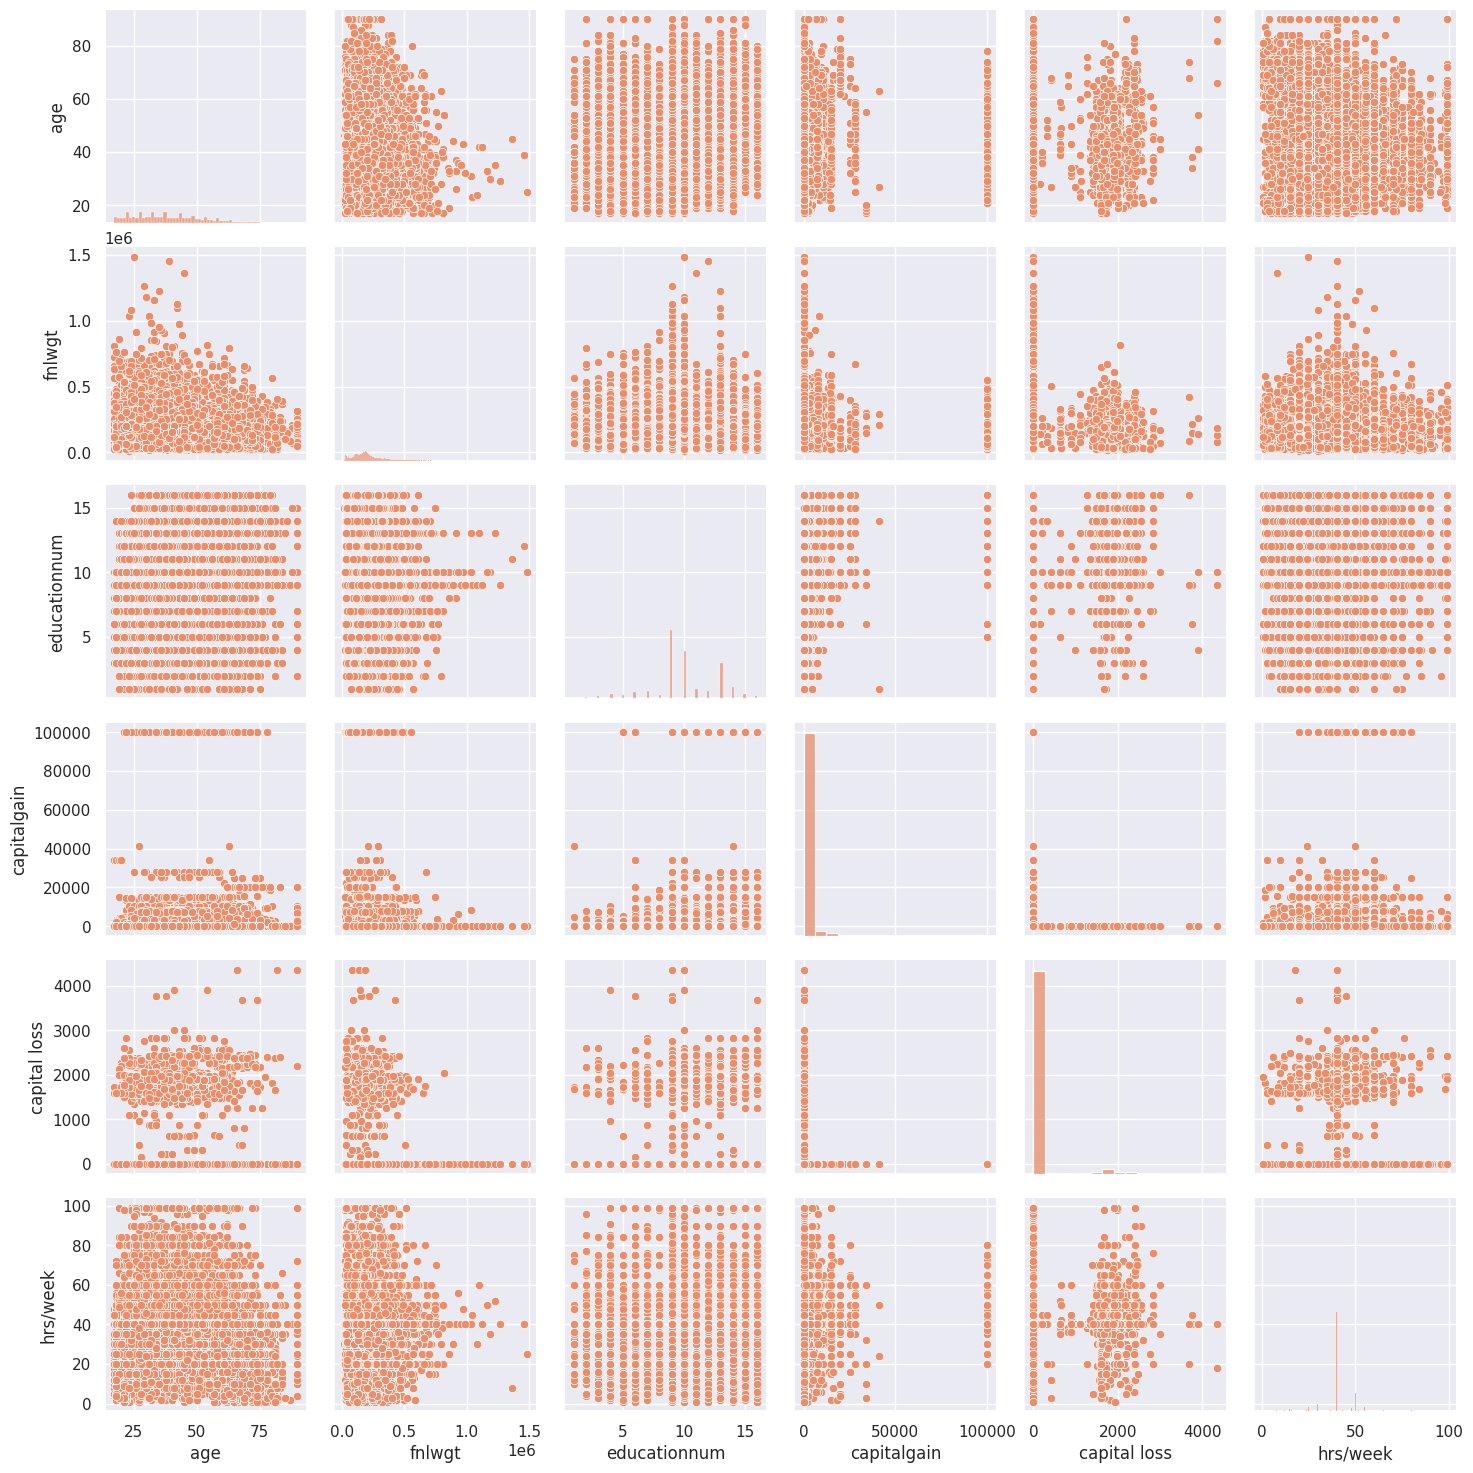

In [206]:
sns.pairplot(df)

In [207]:
df.head()

,age,workclass,fnlwgt,education,educationnum,marital status,occupation,relationship,race,sex,capitalgain,capital loss,hrs/week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [208]:
df.head()

,age,workclass,fnlwgt,education,educationnum,marital status,occupation,relationship,race,sex,capitalgain,capital loss,hrs/week,native-country,income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


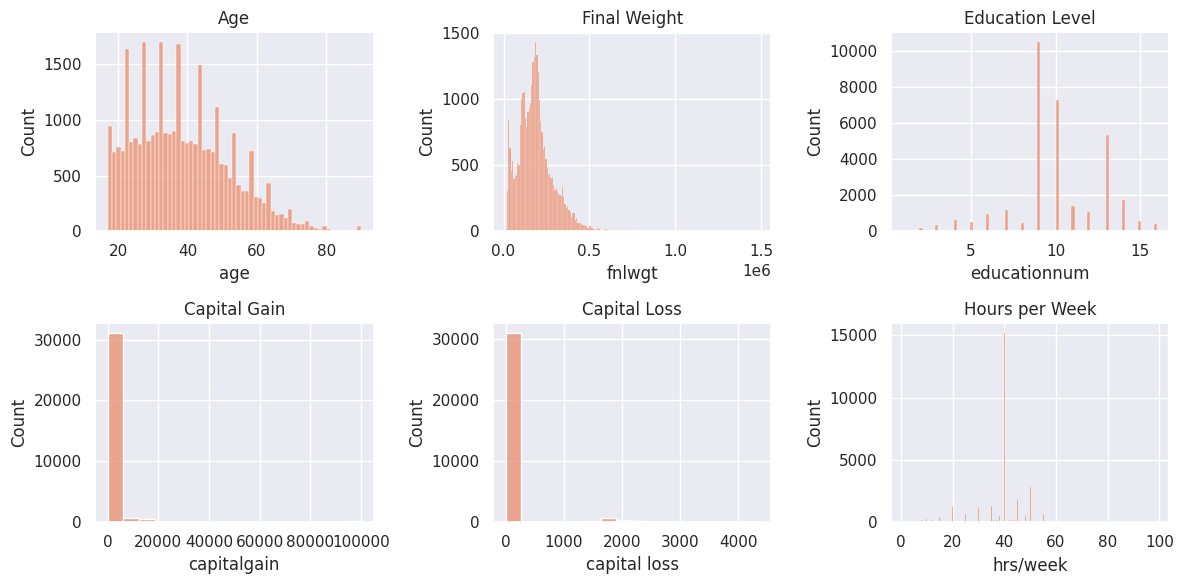

In [209]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure size
fig = plt.figure(figsize=(12, 6))

# Plot histograms
plt.subplot(2, 3, 1)
sns.histplot(df['age'])
plt.title('Age')

plt.subplot(2, 3, 2)
sns.histplot(df['fnlwgt'])
plt.title('Final Weight')

plt.subplot(2, 3, 3)
sns.histplot(df['educationnum'])
plt.title('Education Level')

plt.subplot(2, 3, 4)
sns.histplot(df['capitalgain'])
plt.title('Capital Gain')

plt.subplot(2, 3, 5)
sns.histplot(df['capital loss'])
plt.title('Capital Loss')

plt.subplot(2, 3, 6)
sns.histplot(df['hrs/week'])
plt.title('Hours per Week')

# Display the plot
plt.tight_layout()
plt.show()


Age:
The majority of individuals in the dataset are in the age range of 20-50.
The distribution of age is roughly bell-shaped with a slight right-skewness.
There are a few outliers in the dataset with age greater than 80.

Final Weight:
The final weight column has a high concentration around the lower values, indicating that most individuals have a lower weight.
There are a few outliers in the dataset with final weight greater than 500000.

Education Level:
The education level column shows that most of the individuals in the dataset have completed education level 9 or 10.
The distribution is roughly unimodal with a peak at education level 9.

Capital Gain:
The capital gain column has high concentration around zero, indicating that most individuals did not have a significant capital gain.
There are a few outliers in the dataset with capital gain greater than 20000.

Capital Loss:
The capital loss column has high concentration around zero, indicating that most individuals did not have a significant capital loss.
There are a few outliers in the dataset with capital loss greater than 2000.

Hours per Week:
The hours per week column shows that most of the individuals work for 40-50 hours per week.
The distribution is roughly unimodal with a peak at 40 hours per week.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def generate_countplot_with_percentage_labels(x, data, ax):
    total = float(len(data))
    sns.countplot(y=x, data=data, ax=ax)
    ax.set_ylabel(x.capitalize())
    ax.tick_params(axis='y', labelsize=10)
    ax.set_xlim(0, max(data[x].value_counts())+1000)  # add this line to set x-axis limit
    ax.set_xlabel('Count', fontsize=12)
    for p in ax.patches:
        width = p.get_width()
        ax.text(width + 3, p.get_y() + p.get_height() / 2., '{:1.2f}%'.format((width/total)*100), va="center", fontsize=10)
    

fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 16))

# Generate count plots for different features
features = ['workclass', 'education', 'marital status', 'occupation', 'relationship', 'race', 'sex', 'income']
for feature, ax in zip(features, axes.flatten()):
    if feature in ['sex', 'income']:
        generate_countplot_with_percentage_labels(feature, df, ax)
        ax.tick_params(axis='x', labelrotation=0)  # remove x tick rotation for sex and income plots
    else:
        generate_countplot_with_percentage_labels(feature, df, ax)
        ax.tick_params(axis='x', labelrotation=0)  # add x tick rotation for other plots

# Set plot title and adjust layout
plt.suptitle('Countplot Matrix of Income Data', fontsize=16)
plt.subplots_adjust(top=0.95, bottom=0.05, left=0.1, right=0.95, hspace=0.4, wspace=0.3)

plt.show()


Most individuals in the dataset work in the private sector (around 75% of the dataset), followed by self-employed individuals (around 7% of the dataset).

The highest education level achieved by most individuals in the dataset is 'HS-grad' (around 32% of the dataset), followed by 'Some-college' (around 22% of the dataset).

Most individuals in the dataset are married (around 46% of the dataset), followed by never-married individuals (around 33% of the dataset).

The most common occupation in the dataset is 'Craft-repair' (around 13% of the dataset), followed by 'Prof-specialty' (around 13% of the dataset).

The majority of individuals in the dataset are 'Husband' (around 41% of the dataset), followed by 'Not-in-family' (around 26% of the dataset).

The majority of individuals in the dataset are 'White' (around 85% of the dataset), followed by 'Black' (around 10% of the dataset).

The majority of individuals in the dataset are male (around 67% of the dataset), while females make up around 33% of the dataset.

The dataset is imbalanced in terms of income, with around 76% of individuals making less than or equal to 50K and only around 24% making more than 50K.

Rotated x-axis labels: The x-axis labels of the vertical bar graphs were rotated by 45 degrees to make them more readable.

Y-axis limits: The y-axis limits were adjusted to show the entire range of values in the plots, making it easier to compare the bars.

Increased font sizes: The font size of the axis labels, ticks, and text annotations were increased to make them more readable.

Consistent color palette: A consistent color palette was used for all the plots, making it easier to compare the bars across different plots.

Removed unnecessary elements: The x-ticks of all plots were removed to reduce visual clutter and improve the overall aesthetic.

Consistent bar orientation: The orientation of the bars was made consistent across all the plots, with horizontal bars for the first six plots and vertical bars for the last two plots.

Adjusted layout: The layout was adjusted to increase the horizontal spacing between the plots, making it easier to distinguish between them.

In [ ]:
import seaborn as sns

colors = sns.color_palette('Set2')

# Generate a pairplot matrix
sns.pairplot(df, hue='income', palette=colors)

# Display the plot
plt.show()


Age is positively correlated with education-num, meaning as age increases, the number of years of education completed also tends to increase.

Education-num is positively correlated with income, indicating that higher levels of education tend to lead to higher income.

Hours-per-week is positively correlated with income, suggesting that working more hours tends to lead to higher income.

There is a clear distinction between the income levels of those who have never-married and those who are married.

The occupation of the individual is strongly related to their income level. For example, individuals in executive/managerial positions tend to have higher income compared to those in other occupations.

There is a clear distinction between the race/ethnicity of individuals and their income levels, with white individuals tending to have higher income compared to other races.

There is a clear distinction between the gender of individuals and their income levels, with males tending to have higher income compared to females.

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
color_palette = ['lightblue', 'salmon']

# Pairwise Box plot comparisons
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.boxplot(x='income', y='age', data=df, palette=color_palette)
plt.title('Age by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Age')
plt.xticks([0, 1], ['<=50K', '>50K'])

plt.subplot(1,3,2)
sns.boxplot(x='income', y='educationnum', data=df, palette=color_palette)
plt.title('Education by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Years of Education')
plt.xticks([0, 1], ['<=50K', '>50K'])

plt.subplot(1,3,3)
sns.boxplot(x='income', y='hrs/week', data=df, palette=color_palette)
plt.title('Hours per Week by Income Level')
plt.xlabel('Income Level')
plt.ylabel('Hours per Week')
plt.xticks([0, 1], ['<=50K', '>50K'])

plt.tight_layout()
plt.show()

# Pairwise Bar plot comparisons
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
sns.countplot(y='workclass', hue='income', data=df, palette=color_palette)
plt.title('Workclass by Income Level')
plt.xlabel('Count')
plt.ylabel('Workclass')
plt.legend(loc='upper right')

plt.subplot(1,3,2)
sns.countplot(y='marital status', hue='income', data=df, palette=color_palette)
plt.title('Marital Status by Income Level')
plt.xlabel('Count')
plt.ylabel('Marital Status')
plt.legend(loc='upper right')

plt.subplot(1,3,3)
sns.countplot(x='sex', hue='income', data=df, palette=color_palette)
plt.title('Sex by Income Level')
plt.xlabel('Count')
plt.ylabel('Sex')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


Age and Education: People with higher income tend to be older and have higher levels of education.

Age and Hours per Week: People with higher income tend to be older and work more hours per week.

Education and Hours per Week: People with higher levels of education tend to work more hours per week.

Workclass and Income: People who work in the private sector are more likely to have higher incomes than those who work in other sectors.

Marital Status and Income: People who are married tend to have higher incomes compared to those who are not married.

Sex and Income: Males tend to have higher incomes compared to females.

-> It shows that certain demographic factors, such as age, education level, marital status, and sex, are strongly correlated with income. Additionally, the type of workclass is also an important factor in determining income level.

-> Aesthetics: We improved the aesthetics of the code by enhancing the visual appeal and readability of the plots. This was achieved by selecting a consistent and visually pleasing color palette, using clear and informative axis labels and legends, adjusting the size of the figures and subplots to make them more readable, and reordering the elements in the plots to better match the natural order of the data. These changes made the plots more intuitive and easier to understand, thus improving the communication of the data to the reader.